# Exploratory Data Analysis (EDA) 
Conduct EDA on the USA match 'Diff Data' to examine relationships between variables and other patterns in the data.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Show plots inline
%matplotlib inline

In [21]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df = pd.read_csv('../data/output/final_diffs_all.csv')

In [3]:
df.shape

(168, 14)

## Cleanup

In [4]:
## Apply upper() to 'Opp' column to make all team names uppercase
df['Opp'] = df['Opp'].str.upper()

In [5]:
# Replace NaN's with zero
df.fillna(value=0, inplace=True)

In [ ]:
# Get layout of data file
df.info()

Create a new column and logic to calculate and store the match result for the USA - win, loss or tie.

In [8]:
# create result: win = 1, loss = 0
# if 'Score_Diff' is > 0 = win, if < 0, else tie
def createResult(x):
    if x > 0:
        return 1
    elif x < 0:
        return 0
    elif x == 0:
        return 2

df.loc[:,'Result'] = df.loc[:,'Score_Diff'].apply(createResult)

In [9]:
#Coerce Result to Int
df['Result'] = df['Result'].astype(int)

In [84]:
#Check for NAs
#df.isnull().sum()

In [10]:
# look at the distribution of the data
df.describe()

,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff,Result
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,10.300503,10.149582,10.554611,0.002636,17.536614,-1.675170,-4.105118,-2.860922,0.061262,6.845238,0.146230,-0.069940,0.625000
std,21.003810,45.368439,44.598731,0.475043,27.496685,46.170040,51.236345,59.978021,0.201257,27.860643,0.660731,0.625296,0.565341
min,-43.478261,-100.000000,-100.000000,-1.000000,-58.490566,-166.666667,-100.000000,-100.000000,-0.550000,-50.000000,-1.000000,-1.000000,0.000000
25%,-3.485695,-19.423077,-20.000000,-0.333333,1.867414,-33.333333,-33.333333,-33.333333,-0.083333,0.000000,0.000000,0.000000,0.000000
50%,10.644855,8.391608,0.000000,0.000000,17.020251,0.000000,0.000000,0.000000,0.078571,0.000000,0.000000,0.000000,1.000000
75%,23.599703,41.248207,42.857143,0.333333,34.727772,33.333333,33.333333,33.333333,0.182197,0.000000,0.812500,0.000000,1.000000
max,72.272727,100.000000,100.000000,1.000000,90.909091,133.333333,100.000000,100.000000,0.875000,100.000000,1.000000,1.000000,2.000000


In [11]:
# Head() the dataframe
df.head(5)

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff,Result
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,0.083333,50.0,0.333333,1.0,0
1,WALES,2015_Cape_Town,7.471264,15.555556,14.285714,0.083333,27.868852,25.000000,-20.000000,-100.000000,0.250000,0.0,-1.000000,0.0,1
2,KENYA,2015_Cape_Town,-33.136095,-44.444444,-33.333333,-0.750000,-10.638298,-16.666667,66.666667,60.000000,-0.550000,0.0,-1.000000,0.0,0
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,-75.000000,-50.000000,-100.000000,0.250000,0.0,0.000000,-1.0,1
4,FIJI,2015_Cape_Town,12.880562,-20.833333,-25.000000,0.266667,38.461538,-66.666667,-33.333333,-33.333333,0.208333,0.0,-1.000000,0.0,0


In [ ]:
#check datatypes of all features
df.dtypes

In [13]:
# Accessing the features (column names)
df.columns

Index(['Opp', 'Tournament', 'Poss_Time_Diff', 'Score_Diff', 'Conv_Diff',
       'Tries_Diff', 'Passes_Diff', 'Contestable_KO_Win_pct_Diff',
       'PenFK_Against_Diff', 'RuckMaul_Diff', 'Ruck_Win_pct_Diff',
       'Cards_diff', 'Lineout_Win_Pct_Diff', 'Scrum_Win_Pct_Diff', 'Result'],
      dtype='object')

In [97]:
#Get value counts of a column
#Use for any/all columns
#df.Ruck_Win_pct_Diff.value_counts()

Text(0.5, 0, 'Possession Time Difference')

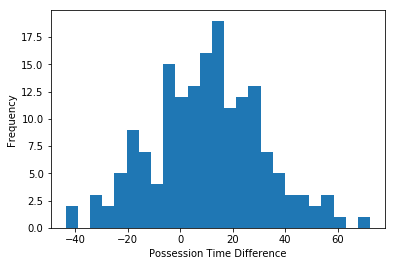

In [18]:
#Plot values for Poss_Time_Diff column
#Use for any/all columns
ax = df.Poss_Time_Diff.plot('hist', bins=25)
ax.set_xlabel("Possession Time Difference")
#ax.set_ylabel("y label")

Text(0.5, 0, 'Passes per Game Difference')

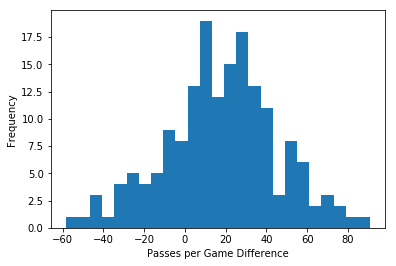

In [19]:
# Passes_Diff
ax = df.Passes_Diff.plot('hist', bins=25)
ax.set_xlabel("Passes per Game Difference")

### Create dataframes of Wins, Losses, Ties

In [24]:
#Get all USA Wins
usa_w = df[df['Result'] == 1]
#Get all USA Losses
usa_l = df[df['Result'] == 0]
#Get all USA Ties
usa_t = df[df['Result'] == 2]

## Distributions of data
Look at the distribution of data for select features.

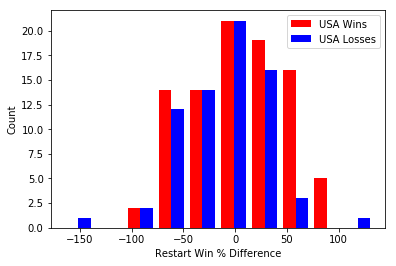

In [25]:
#Create a histogram of Contestable_Restart_Win_Pct
# CHANGE VALUES TO %
wins = usa_w['Contestable_KO_Win_pct_Diff']
losses = usa_l['Contestable_KO_Win_pct_Diff']
legend = ['USA Wins', 'USA Losses']
plt.hist([wins, losses], color=['red', 'blue'], bins=10)
plt.ylabel('Count')
plt.xlabel('Restart Win % Difference')
plt.legend(legend)
plt.show()

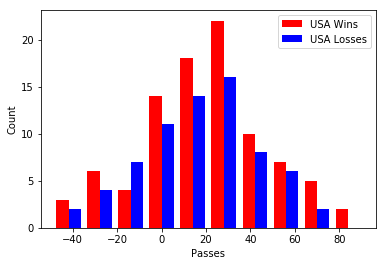

In [26]:
#Passes
pass_wins = usa_w['Passes_Diff']
pass_losses = usa_l['Passes_Diff']
legend = ['USA Wins', 'USA Losses']
plt.hist([pass_wins, pass_losses], color=['red', 'blue'], bins=10)
plt.ylabel('Count')
plt.xlabel('Passes')
plt.legend(legend)
plt.show()

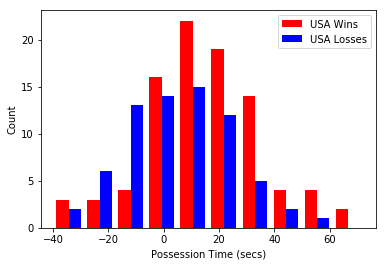

In [27]:
#Possession Time
poss_wins = usa_w['Poss_Time_Diff']
poss_losses = usa_l['Poss_Time_Diff']
legend = ['USA Wins', 'USA Losses']
plt.hist([poss_wins, poss_losses], color=['red', 'blue'], bins=10)
plt.ylabel('Count')
plt.xlabel('Possession Time (secs)')
plt.legend(legend)
plt.show()

Text(0.5, 0, 'Contestable Kickoff Win %')

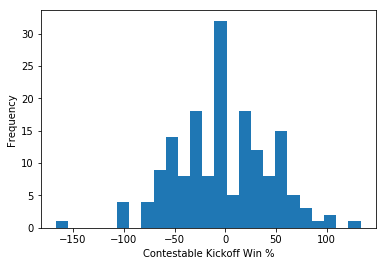

In [30]:
# Contestable KOs
ax = df.Contestable_KO_Win_pct_Diff.plot('hist', bins=25)
ax.set_xlabel("Contestable Kickoff Win %")

Text(0.5, 0, 'Penalty/FK Against Difference')

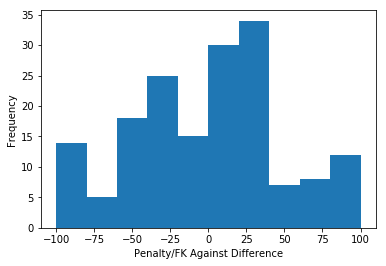

In [31]:
# Pen/FK Against
ax = df.PenFK_Against_Diff.plot('hist', bins=10)
ax.set_xlabel("Penalty/FK Against Difference")

Text(0.5, 0, 'Ruck Win % Difference')

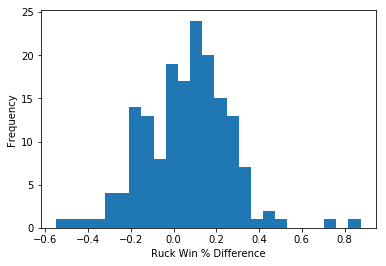

In [32]:
# Rucks Won %
ax = df.Ruck_Win_pct_Diff.plot('hist', bins=25)
ax.set_xlabel("Ruck Win % Difference")

Text(0.5, 0, 'Yellow/Red Cards Against Difference')

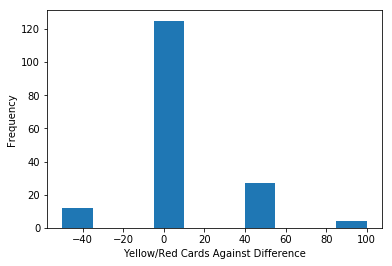

In [33]:
# Cards against
ax = df.Cards_diff.plot('hist', bins=10)
ax.set_xlabel("Yellow/Red Cards Against Difference")

Text(0.5, 0, 'Lineout Win % Difference')

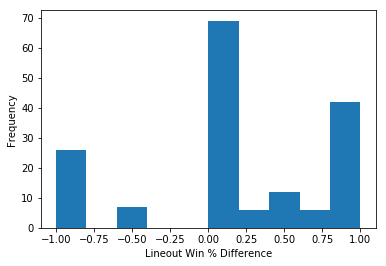

In [34]:
# LO win %
ax = df.Lineout_Win_Pct_Diff.plot('hist', bins=10)
ax.set_xlabel("Lineout Win % Difference")

Text(0.5, 0, 'Scrum Win % Difference')

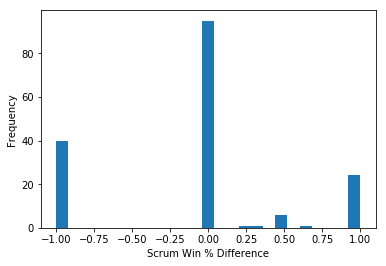

In [35]:
# Scrum win %
ax = df.Scrum_Win_Pct_Diff.plot('hist', bins=25)
ax.set_xlabel("Scrum Win % Difference")

Text(0.5, 0, 'Match Result Distribution: 0=Loss, 1=Win, 2=Tie')

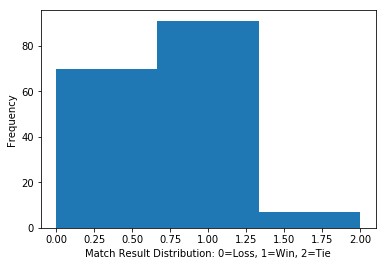

In [39]:
# Result (w/l/t)
ax = df.Result.plot('hist', bins=3)
ax.set_xlabel("Match Result Distribution: 0=Loss, 1=Win, 2=Tie")

In [40]:
# Accessing the index (row names)
df.index

RangeIndex(start=0, stop=168, step=1)

## Compare Results

In [41]:
#Count wins against opponents
usa_w_opp = df['Opp'][df['Result'] == 1]
usa_l_opp = df['Opp'][df['Result'] == 0]
usa_t_opp = df['Opp'][df['Result'] == 2]
print("USA Wins against opponents") 
print(usa_w_opp.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True))
print('\n')
print("USA Losses against opponents") 
print(usa_l_opp.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True))
print('\n')
print("USA Ties against opponents")      
print(usa_t_opp.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True))

USA Wins against opponents
ARGENTINA       10
WALES            9
SAMOA            7
NEW ZEALAND      7
AUSTRALIA        7
CANADA           7
FRANCE           6
PORTUGAL         5
FIJI             5
ENGLAND          4
SCOTLAND         4
RUSSIA           4
SPAIN            4
JAPAN            3
KENYA            3
SOUTH AFRICA     2
UGANDA           1
URUGUAY          1
CHILE            1
PNG              1
Name: Opp, dtype: int64


USA Losses against opponents
SOUTH AFRICA    12
NEW ZEALAND     10
FIJI             9
SCOTLAND         6
ENGLAND          6
AUSTRALIA        5
ARGENTINA        5
KENYA            4
SAMOA            3
CANADA           3
FRANCE           3
WALES            2
RUSSIA           1
IRELAND          1
Name: Opp, dtype: int64


USA Ties against opponents
CANADA     2
KENYA      2
FRANCE     2
ENGLAND    1
Name: Opp, dtype: int64


In [67]:
# Create DFs With only numerical values
# Removed tries, conversions & results
cols = ['Poss_Time_Diff', 'Score_Diff', 'Passes_Diff', 'Contestable_KO_Win_pct_Diff','PenFK_Against_Diff', 'RuckMaul_Diff', 'Ruck_Win_pct_Diff','Cards_diff', 'Lineout_Win_Pct_Diff', 'Scrum_Win_Pct_Diff']
#usa_w_num = df[['Poss_Time_Diff', 'Score_Diff', 'Conv_Diff','Tries_Diff', 'Passes_Diff', 'Contestable_KO_Win_pct_Diff','PenFK_Against_Diff', 'RuckMaul_Diff', 'Ruck_Win_pct_Diff','Cards_diff', 'Lineout_Win_Pct_Diff', 'Scrum_Win_Pct_Diff', 'Result']]
usa_num = df[cols]
usa_w_num = usa_w[cols]
usa_l_num = usa_l[cols]
usa_t_num = usa_t[cols]

## Create  Data Queries 
Querying data for opposition and result analysis

In [52]:
#Test query
#Select all USA losses against Fiji i.e., 'Result' == 0 (USA's Result)
#usa_L_v_fiji = df.query('Opp == "FIJI"')[df.Result == 0]

#get the mean difference in losses to Fiji
#usa_L_v_fiji.mean()

#print('Mean difference in USA losses to Fiji')
#print('\n')
#print(usa_L_v_fiji.mean())

### Data Query Method
Use **df.query** to create data queries for team and result analysis

In [46]:
#Debugging Uruguay/NaN issue
#print(opponents)
#team = opponents
team = "NEW ZEALAND"
resultcode = 1
test_opp = df.query('(Opp == @team) & (Result == @resultcode)')
test_opp

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff,Result
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,-75.000000,-50.000000,-100.000000,0.250000,0.0,0.0,-1.0,1
7,NEW ZEALAND,2015_Dubai,-29.189189,7.692308,0.000000,0.500000,-48.837209,-50.000000,20.000000,0.000000,-0.169231,-50.0,0.0,-1.0,1
10,NEW ZEALAND,2015_Dubai,14.795918,44.186047,42.857143,0.100000,35.593220,-60.000000,0.000000,14.285714,0.070707,50.0,0.0,0.0,1
37,NEW ZEALAND,2016_London,23.200000,50.000000,50.000000,0.000000,58.730159,-40.000000,0.000000,0.000000,0.285714,0.0,0.0,1.0,1
78,NEW ZEALAND,2017_Las_Vegas,11.166253,11.764706,0.000000,0.666667,-3.125000,0.000000,-14.285714,-20.000000,-0.125000,50.0,1.0,0.0,1
147,NEW ZEALAND,2017-18_Cape_Town,28.473804,100.000000,100.000000,0.250000,14.634146,0.000000,0.000000,0.000000,0.087302,50.0,1.0,1.0,1
152,NEW ZEALAND,2018_Vancouver_7s,18.695652,100.000000,100.000000,0.333333,12.500000,-66.666667,-60.000000,-33.333333,0.146154,50.0,0.0,-1.0,1


In [51]:
df.query('Opp == "AUSTRALIA"')[df.Result == 0]

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff,Result
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,0.083333,50.0,0.333333,1.0,0
67,AUSTRALIA,2016_Wellington,12.935323,-54.545455,-50.000000,-0.333333,22.857143,0.000000,7.692308,0.000000,-0.216667,0.0,0.250000,0.0,0
72,AUSTRALIA,2017_Hong_Kong,-2.232143,-15.555556,-14.285714,-0.083333,-8.196721,25.000000,-60.000000,-33.333333,0.272727,0.0,-1.000000,0.0,0
124,AUSTRALIA,2017-18_Sydney_7s,6.888361,-15.555556,-14.285714,-0.083333,31.147541,-30.000000,60.000000,33.333333,-0.116667,0.0,-0.500000,-1.0,0
126,AUSTRALIA,2018_Vancouver_7s,19.685039,-19.230769,-25.000000,0.400000,38.461538,-16.666667,33.333333,0.000000,0.000000,0.0,0.000000,0.0,0


## Visualize Relationships between Variables

Let's use a Correlation Matrix to look at the relationships between variables in all USA matches, USA Wins and USA Losses. Features such as Tries, Conversions and Result have been removed. The 'score_diff' feature serves as a proxy for the result.

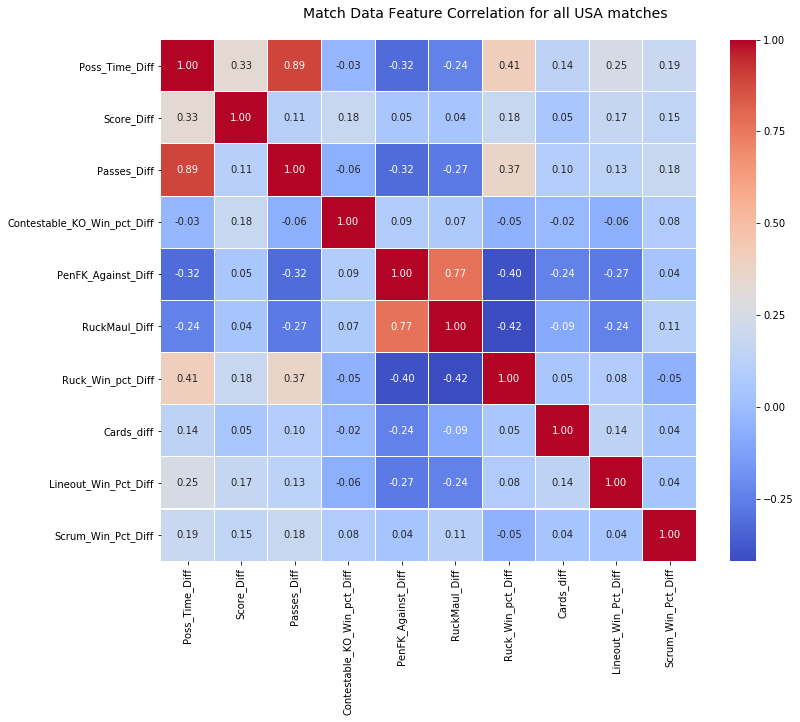

In [87]:
#correlation matrix 1
#Create a correlation heatmap for looking at the correlation of all variables/features for all USA matches
corrmat = usa_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for all USA matches', fontsize=14)

The correlation matrix, which contains a subset of only numeric variables, indicates the following notable relationships between variables:

**Strong Correlation**  
Poss Time Diff : Passes Diff (.89)  
PenFK Against Diff : RuckMaul Diff (.77)

**Moderately Strong Negative Correlation**  
PenFK Against Diff : Ruck Win Pct Diff (.40)  
Ruck Win Pct Diff : RuckMaul Diff (.42)

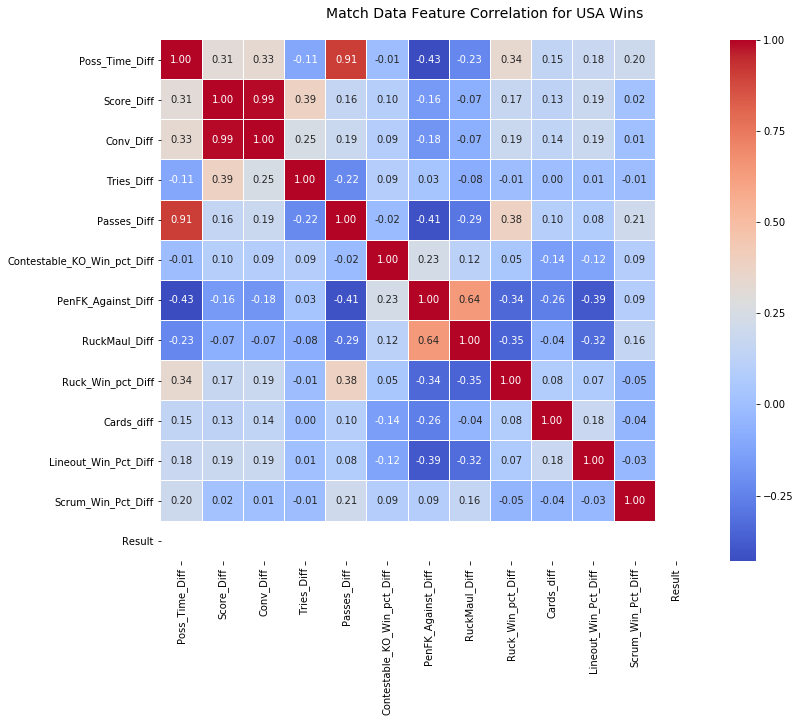

In [60]:
#correlation matrix 2
#Create a correlation heatmap for looking at the correlation of all variables/features for USA wins
corrmat = usa_w_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for USA Wins', fontsize=14)

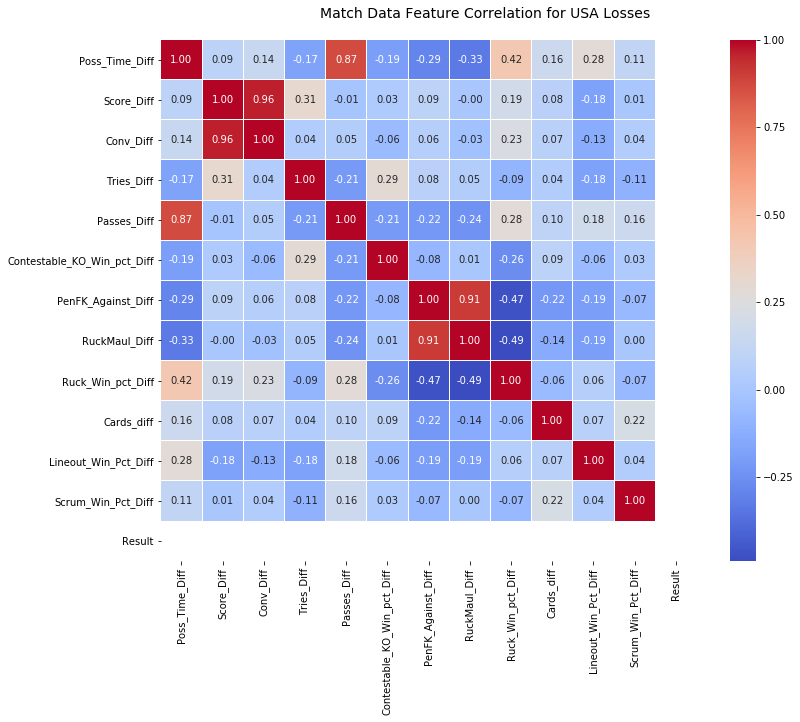

In [61]:
#Correlation matrix 3
#Create a correlation heatmap for looking at the correlation of all variables/features for USA *LOSSES*
corrmat = usa_l_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for USA Losses', fontsize=14)

In [ ]:
#Test
#sns.palplot(sns.color_palette("RdBu"))
#sns.lmplot(data=usa_w_num, x='Poss_Time_Diff', y='Passes_Diff', legend=True, palette="RdBu")

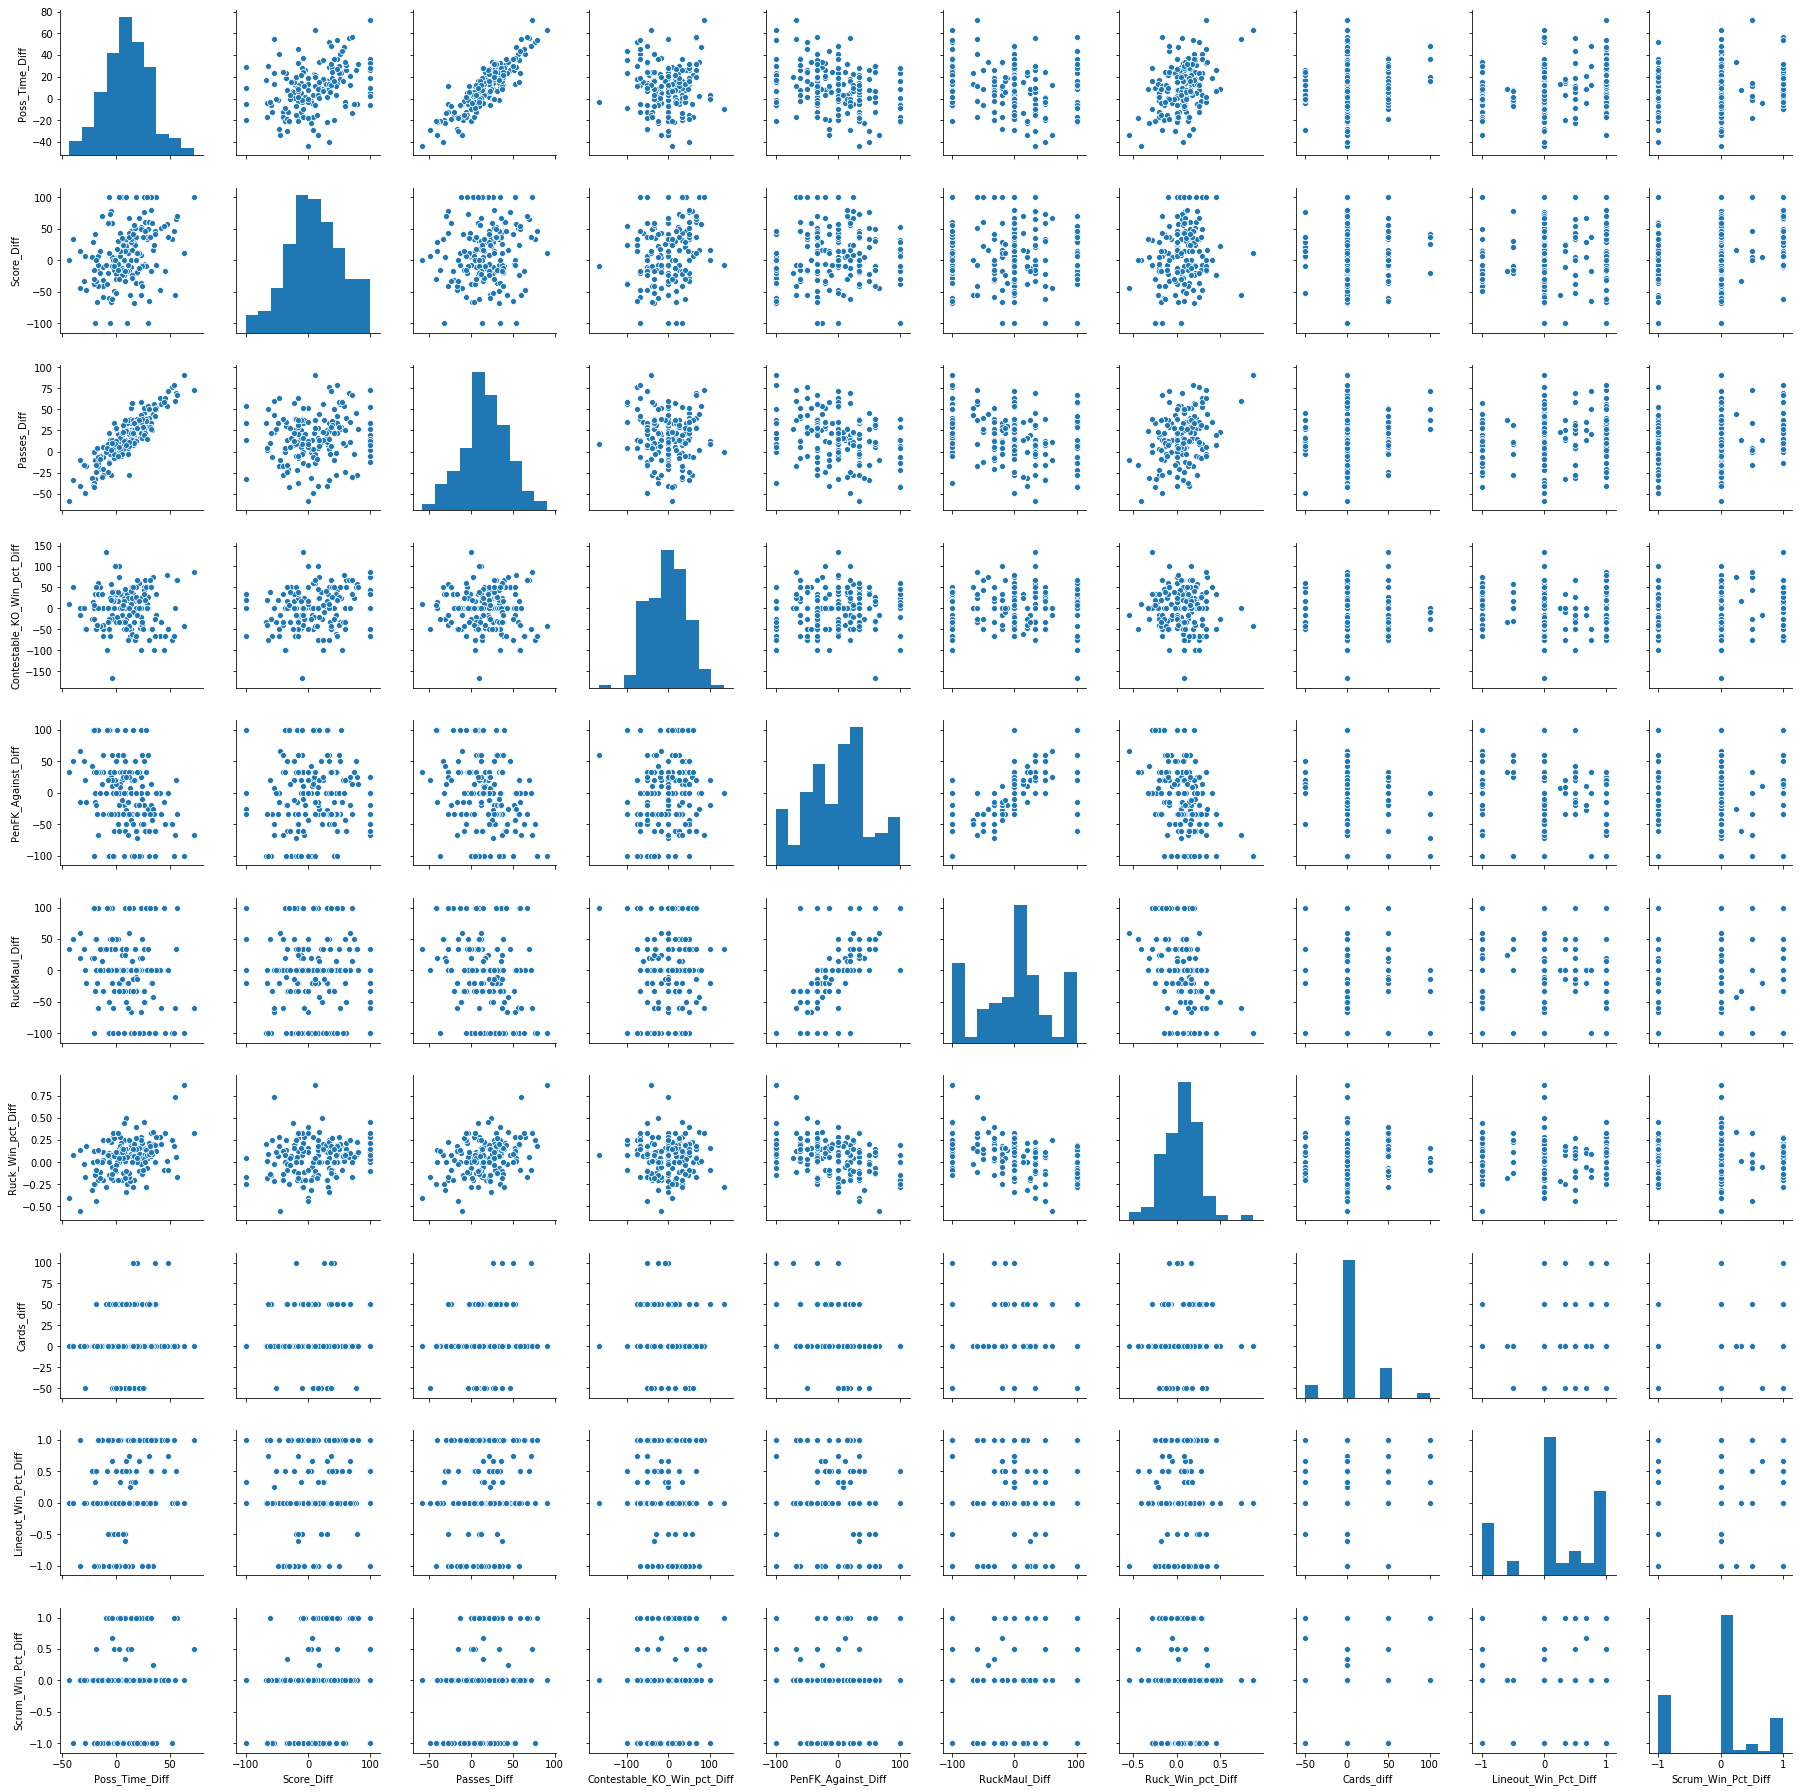

In [68]:
#Create a pairplot for all numeric variables
sns.pairplot(usa_num,  palette='Set1')
plt.show()

## Visualize Notable Correlations

In [90]:
#Get a list of columns in usa_num
#usa_num.columns

**Strong Correlation** 
Poss Time Diff : Passes Diff (.89)

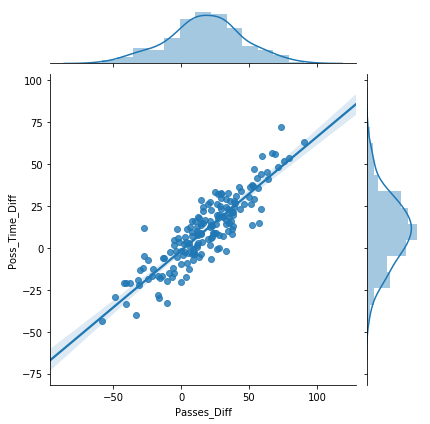

In [91]:
#Plot relationship between Poss Time Diff and Passes Diff
sns.jointplot(x='Passes_Diff', y='Poss_Time_Diff', data=usa_num, kind="reg");

**Moderately Strong Correlation** 
PenFK Against Diff : RuckMaul Diff (.77)

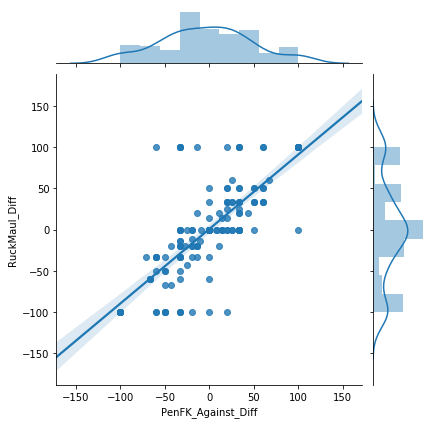

In [78]:
#Plot relationship between Poss Time Diff and Passes Diff
sns.jointplot(x='PenFK_Against_Diff', y='RuckMaul_Diff', data=usa_num, kind="reg");

**Moderately Strong Negative Correlation**  
PenFK Against Diff : Ruck Win Pct Diff (-.40)

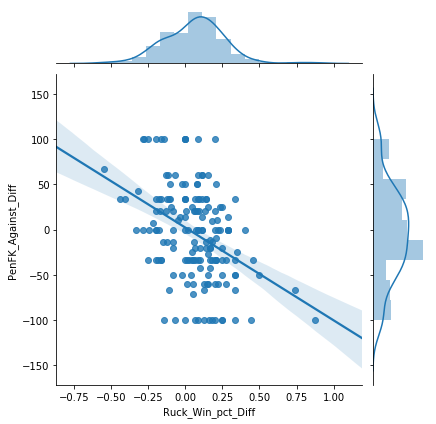

In [93]:
#PenFK Against Diff : Ruck Win Pct Diff (.40)
sns.jointplot(x='Ruck_Win_pct_Diff', y='PenFK_Against_Diff', data=usa_num, kind="reg");

**Moderately Strong Negative Correlation**  
Ruck Win Pct Diff : RuckMaul Diff (-.42)

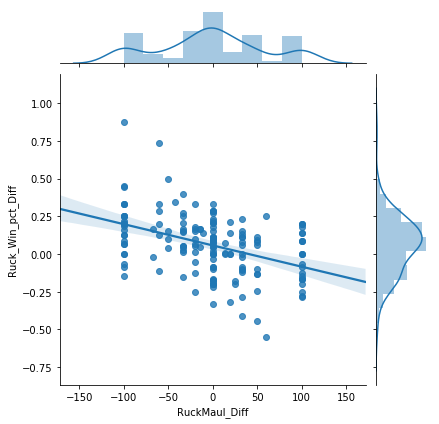

In [95]:
#Ruck Win Pct Diff : RuckMaul Diff (.42)
sns.jointplot(x='RuckMaul_Diff', y='Ruck_Win_pct_Diff', data=usa_num, kind="reg");

## Correlations
The findings from the EDA analysis of the variables and correlations revealed that the strongest positive correlation is between the Possession Time Difference and Passes Difference (r=0.89). This makes sense intuitively, as typically the more time a team has possession of the ball, the more passes they will make.

Additionally, there was a moderately strong correlation between the Penalty-Free Kick Against Diff variable and the Ruck Maul Diff (number of rucks/mauls by a team) (r=0.77).  It appears that as the number of rucks that a team has rises, so does the incidences of penalties - likely from ruck infringements/penalties.

There were two weak-moderately strength negative correlations.  The first, between PenFK Against Diff and Ruck Win Pct Diff (r=-0.40), suggests that as the percentage of rucks won increases, the penalties against that team decreases.

The second, between Ruck Win Pct Diff and RuckMaul Diff (r=-0.42), amy indicate that as the number of rucks in a game increases, the percentage of rucks won decreases.

It's worth noting that three of the four strongest correlations are related to rucks and penalties.  The ruck contest is by far the most heavily-penalized area of the game, so these correlations align with that feature of the game.

Interestingly, there is no single variable that has even a moderately strong correlation with Score Difference (a.k.a, a win or loss). The strongest correlation is with Possession Time Difference (r=0.33), and the next strongest is Contestable Restart Win % (r=0.18).